# Pytorch refresher (Speech Technology course, HS 2024)

In [1]:
import torch

In [2]:
print(torch.__version__)

2.4.1+cu121


# Import data from Google drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
! ls ./gdrive/MyDrive/work/uzh/teaching/2024-speech-technology/audio_files

1089-134686-0001.flac				  pink_noise.m4a
1089-134686-0001.wav				  pink_noise.wav
1089-134686-0001_w_babble.wav			  Room001-00001.wav
1089-134686-0001_w_noise.wav			  Sbb_sample_announcement_16khz.wav
1089-134686-0001_w_rir.wav			  Sbb_sample_announcement.m4a
1688-142285-0001.flac				  Sbb_sample_announcement.wav
1688-142285-0001.wav				  sound-effect-night-ambient-noise_130bpm_C#.wav
conversational.wav				  speech-librivox-0002.wav
ES2005a.wav					  sw02001.sph
LKPR_RUZYNE_Tower_134_560MHz_20201025_090915.wav  sw02001_v2.wav
music-fma-0000.wav				  white-noise-buzz.wav
noise-free-sound-0001.wav


In [11]:
filename = './gdrive/MyDrive/work/uzh/teaching/2024-speech-technology/audio_files/1089-134686-0001.wav'

# Replicating our pydub notebook in colab

We saw the following set of commands presented on a personal notebook. In the next set of commands, we will replicate it in a Google colab notebook.

### Install pydub

In [12]:
!pip install pydub

In [13]:
from pydub import AudioSegment

In [14]:
# load the audio files
samples = AudioSegment.from_file(filename, 'wav')

In [15]:
# print the number of samples
len(samples)

3275

In [18]:
sampling_rate = samples.frame_rate
sampling_rate

16000

In [20]:
from IPython.display import Audio, display
display(Audio(filename))


## Pytorch

Tensor is a fundamental object in [Pytorch](https://www.pytorch.org).

A tensor can be used to represent

1. Vectors
2. Matrices
3. A group of matrices


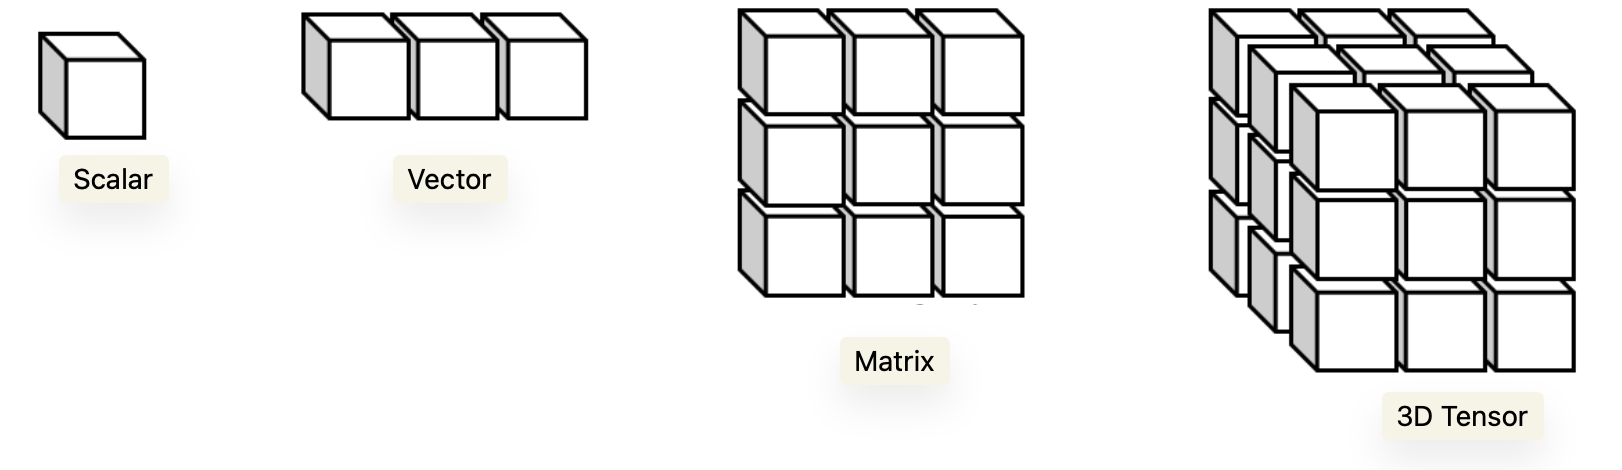

In [3]:
scalar = torch.Tensor([0.5])
vector = torch.Tensor([2, 3, 4])
# Below the matrix is created from a list of lists, also called "nested list"
matrix = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
scalar, vector, matrix

(tensor([0.5000]),
 tensor([2., 3., 4.]),
 tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]))

In [48]:
# access values: indexes start from 0
vector[1], matrix[1, 2]

(tensor(3.), tensor(6.))

In [50]:
# reshape vectors
vector = torch.Tensor(list(range(25)))
vector

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [51]:
vector.shape

torch.Size([25])

In [52]:
matrix = vector.reshape(5, 5)
matrix

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.]])

In [54]:
# access a range of values
matrix[2:4, 2:4]

tensor([[12., 13.],
        [17., 18.]])

### Data types

In [27]:
# Print the data type of a vector
vector.dtype

torch.float32

The following data types are useful to now

1. torch.int32: 32-bit integer
2. torch.float16: 16-bit floating point. The default type is 32-bit floating point value.
3. torch.bool: Boolean values. Can store true or false.

### Device

Every tensor is stored in the memory of one of two devices

1. Central Processing Unit (CPU) <-- this is the default location
2. Graphical processing unit (GPU)

Typically, to speed-up the processing we perform computations with the GPU. Since, the default memory location is in the CPU's memory, we need to move the the data in the tensors to the GPU.

In [45]:
torch.cuda.is_available()

True

In Colab, we need to make sure we have access to GPUs. Look at the top of the screen below the address bar

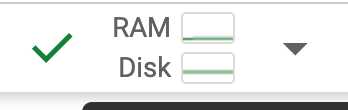

<image src="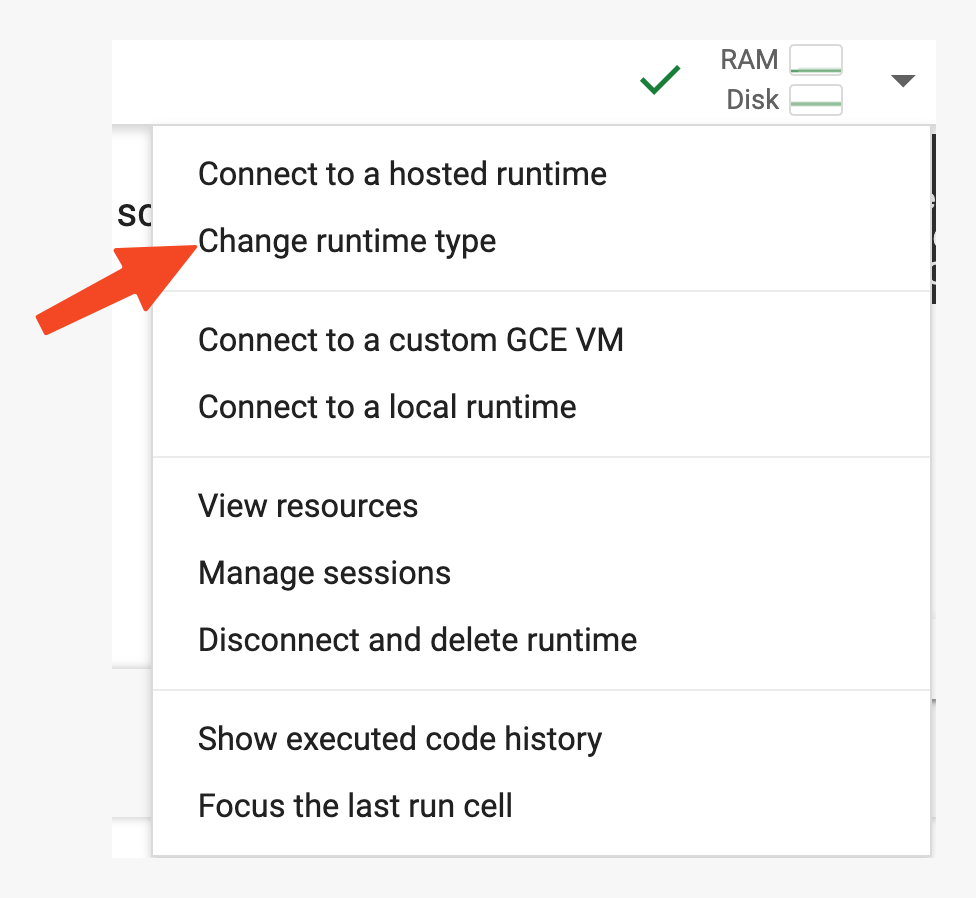" width=500 height=500></img>

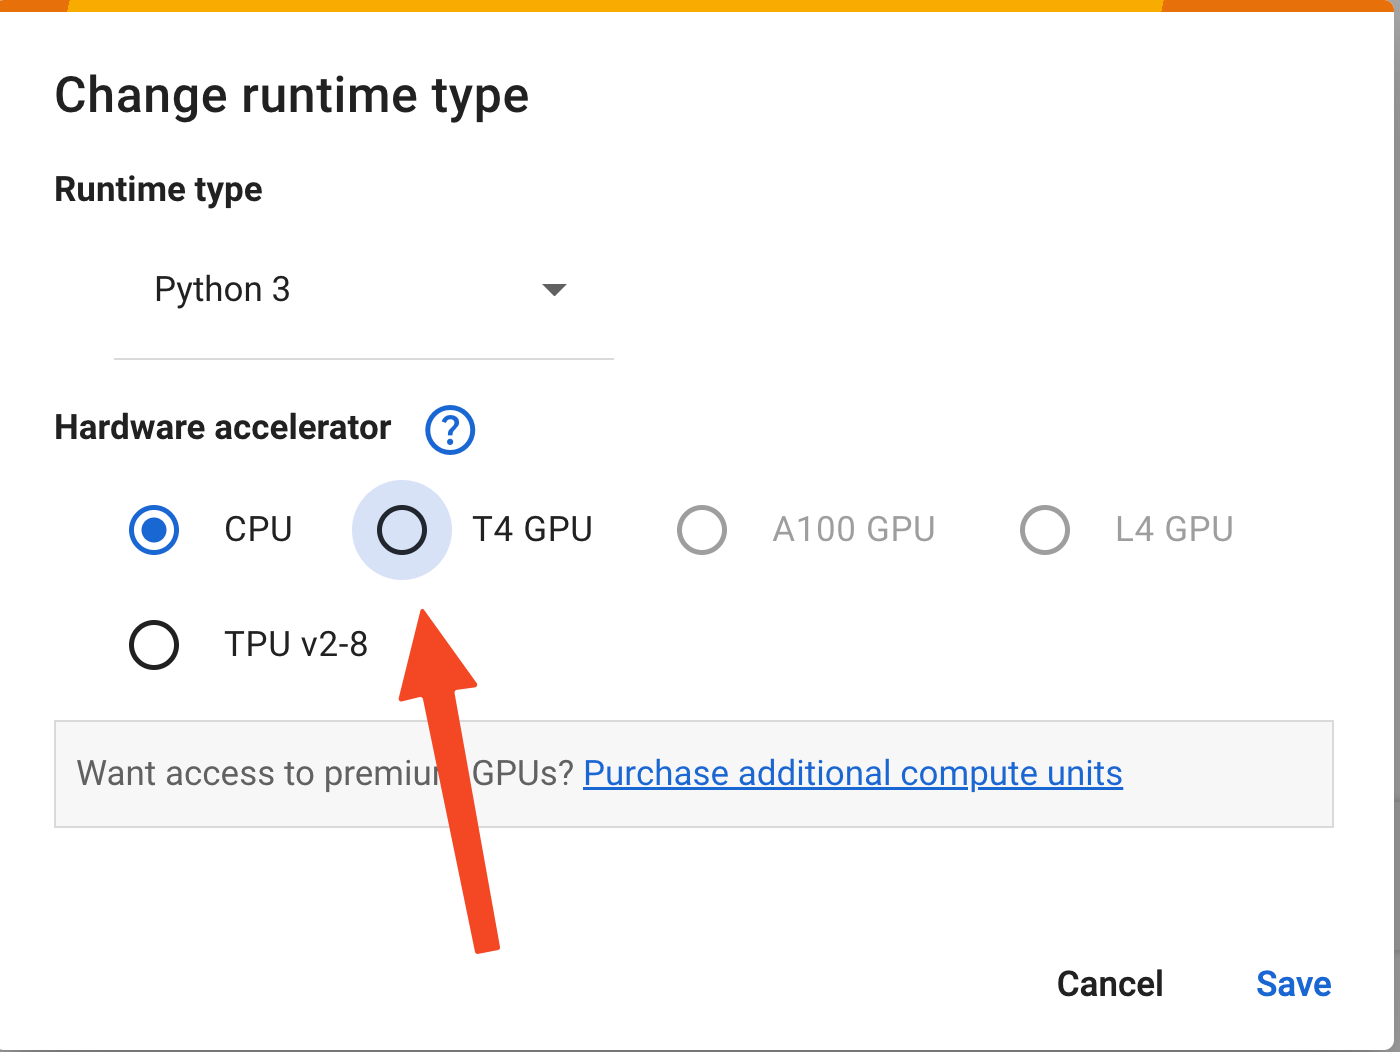

Now we have access to GPU.

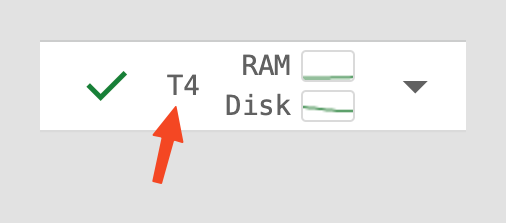

In [4]:
scalar.device

device(type='cpu')

In [5]:
# to move the value to the GPU simply run
scalar.cuda()

tensor([0.5000], device='cuda:0')

In [8]:
scalar.device  # but the original variable still is in the CPU!!

device(type='cuda', index=0)

In [9]:
scalar = scalar.cuda()
scalar.device

device(type='cuda', index=0)

# Matrix operations

In [29]:
# Create a tensor with random values between 0 and 1 with the shape [3, 4]
x = torch.rand(3, 4)
print(x)

tensor([[0.4816, 0.8190, 0.3541, 0.6228],
        [0.4322, 0.8490, 0.9107, 0.0995],
        [0.3573, 0.2244, 0.7973, 0.2971]])


In [12]:
# shape of the matrix
x.shape

torch.Size([3, 4])

In [16]:
x.size() # equivalent operation

torch.Size([3, 4])

In [17]:
# getting the number of rows and columns of any given tensor
n_rows, n_cols = x.shape
n_rows, n_cols

(3, 4)

In [30]:
# Transpose matrix
x.T

tensor([[0.4816, 0.4322, 0.3573],
        [0.8190, 0.8490, 0.2244],
        [0.3541, 0.9107, 0.7973],
        [0.6228, 0.0995, 0.2971]])

In [31]:
# all possible operations!!!
dir(x)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed_

In [33]:
# arithmetic operations
x = torch.randn(3, 3)
y = torch.randn(3, 3)
a = torch.Tensor([10])
x, y, a

(tensor([[-0.0649,  0.7945, -1.3573],
         [-0.9785, -3.0741,  0.3282],
         [ 1.8345, -0.3750, -0.1521]]),
 tensor([[-0.0347, -0.0852,  0.9307],
         [-0.2135,  0.7953, -0.3201],
         [ 0.4162,  0.4727,  2.5925]]),
 tensor([10.]))

In [34]:
a * x

tensor([[ -0.6491,   7.9453, -13.5733],
        [ -9.7854, -30.7405,   3.2818],
        [ 18.3448,  -3.7495,  -1.5214]])

In [41]:
2**x, 2**x[0, 0]

(tensor([[0.9560, 1.7345, 0.3903],
         [0.5075, 0.1187, 1.2554],
         [3.5664, 0.7711, 0.8999]]),
 tensor(0.9560))

In [43]:
x**2  # square each element

tensor([[4.2128e-03, 6.3127e-01, 1.8424e+00],
        [9.5754e-01, 9.4498e+00, 1.0770e-01],
        [3.3653e+00, 1.4059e-01, 2.3147e-02]])

In [35]:
x + y

tensor([[-0.0996,  0.7094, -0.4266],
        [-1.1921, -2.2788,  0.0080],
        [ 2.2507,  0.0977,  2.4404]])

In [36]:
# WARNING: Elementwise multiplication
x * y

tensor([[ 2.2542e-03, -6.7671e-02, -1.2633e+00],
        [ 2.0896e-01, -2.4447e+00, -1.0506e-01],
        [ 7.6350e-01, -1.7723e-01, -3.9442e-01]])

In [39]:
# Matrix multiplication
x.mm(y)

tensor([[-0.7323, -0.0042, -3.8336],
        [ 0.8270, -2.2062,  0.9242],
        [-0.0470, -0.5263,  1.4330]])

### Some special matrices

In [18]:
# Diagonal matrix
x = torch.Tensor([1, 2, 3])
x

tensor([1., 2., 3.])

In [19]:
# create a diagonal values from this matrix
x.diag()

tensor([[1., 0., 0.],
        [0., 2., 0.],
        [0., 0., 3.]])

In [20]:
x= torch.randn(3, 3)
x

tensor([[ 0.0307, -1.4279, -0.4419],
        [ 0.2919, -0.3844,  0.1095],
        [ 0.8578,  1.9154, -0.3987]])

In [21]:
# Take only the diagonal values
x.diag()

tensor([ 0.0307, -0.3844, -0.3987])

In [22]:
# Homework: create a diagonal value from x with only diag() operations

#### One and Zero matrices

In [25]:
# create a matrix with all values 1.0
x = torch.ones((3,))
x # a column vector with 3 values

tensor([1., 1., 1.])

In [26]:
# create a matrix with all values 0.0
x = torch.zeros((3,4))
x

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [27]:
# Homework: recall what should x.device be?


In [44]:
# Seeking help
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_dtype`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, us

## Calculate euclidean distance between two vectors

If we have two d-dimensional vectors $\mathbf{x}$ and $\mathbf{y}$ where

$$ \mathbf{x} = \begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_d \end{bmatrix}$$

$$ \mathbf{y} = \begin{bmatrix}y_1 \\ y_2 \\ \vdots \\ y_d \end{bmatrix}$$

the euclidean distance (length of the straight line connecting the two points) between the two is given by

$$ \text{dist} = \sqrt{\sum_{i=1}^{d} (x_i - y_i)^2} $$

## Without pytorch

In [9]:
x = [1, 2, 3, 4, 5]
y = [11, 3, 9, -1, -3]

In [10]:
import math
def euclidean_distance(a, b):
    assert len(a) == len(b), "The two inputs should be of same length"
    d = len(a)
    s = 0.
    for i in range(d):
      s += (a[i] - b[i])**2
    dist = math.sqrt(s)
    return dist

euclidean_distance(x, y)


15.033296378372908

## With pytorch

- We can convert the for loop in the above code to a single operation
- This ability is called **vectorization**

In [11]:
# 1. convert to tensors
x = torch.Tensor(x)
y = torch.Tensor(y)

def euclidean_distance_torch(x, y):
  # Homework: write your assertion here
  elementwise_difference = (x-y)
  elementwise_squared_difference = elementwise_difference**2
  s = elementwise_squared_difference.sum()
  dist = s.sqrt()
  return dist

def euclidean_distance_torch_oneline(x, y):
  return ((x-y)**2).sum().sqrt()

euclidean_distance_torch(x, y)

tensor(15.0333)

In [12]:
euclidean_distance_torch_oneline(x, y)

tensor(15.0333)

The above code is between two vectors. Typically, we operate at 1000s (or millions of vectors at a time). This gives rise to matrix where the columns are data values and rows are data points. Of course, you could also arrange the columns to be data points and rows to be data values.

In [15]:
# example
x = torch.randn(10, 40)
y = torch.randn(20, 40)

In [17]:
# we then would have to do
n1 = x.shape[0]
n2 = y.shape[0]
pairwise_distance = torch.zeros(n1, n2)
for i in range(n1):
  for j in range(n2):
    a = x[i, :]  # ':' means take all elements
    b = y[j, :]
    pairwise_distance[i, j] = euclidean_distance_torch_oneline(a, b)
pairwise_distance

tensor([[10.3381,  9.8950,  7.0309,  9.4190,  9.9827,  8.1389,  9.8416,  8.9355,
          9.0146,  8.8911,  8.8072,  8.3088,  7.2340, 10.4476, 10.1756,  9.0208,
          8.5419,  7.9497, 11.1962,  8.6164],
        [ 9.1000,  9.1237,  7.9453,  9.4824, 10.4682,  9.2317, 10.1218,  8.4822,
          9.4085,  8.8614,  9.4862,  9.5016,  8.7164, 11.1060, 10.3087, 10.1028,
         10.0941,  8.7197, 10.8475,  9.1397],
        [ 9.2053,  9.5621,  9.5922,  9.0037,  8.6716,  9.2745,  8.9618,  8.9018,
          9.4213,  8.6242,  9.0861,  9.4233,  9.4275,  8.8180,  9.2491,  9.5942,
          9.6364,  8.9090,  8.8901,  9.0610],
        [10.7621,  9.4432,  8.8400,  9.4692,  9.4380,  8.6179,  9.3067, 10.0217,
          9.5199,  9.6452,  9.4422,  9.5046,  9.2918, 10.2556, 10.4721,  9.1352,
         10.0724,  8.4185,  9.9638,  9.1858],
        [ 8.8377, 10.8562,  9.5596,  7.3362,  9.5247,  8.7508,  8.3624, 10.1783,
         10.8466,  9.1613,  8.1918,  9.4160,  8.6055,  9.3224,  9.1259,  7.8945,
      

In [27]:
pairwise_distance2 = torch.zeros(n1, n2)
for i in range(n1):
    pairwise_distance2[i, :] = ((x[i, :] - y)**2).sum(axis=1).sqrt()
pairwise_distance2

tensor([[10.3381,  9.8950,  7.0309,  9.4190,  9.9827,  8.1389,  9.8416,  8.9355,
          9.0146,  8.8911,  8.8072,  8.3088,  7.2340, 10.4476, 10.1756,  9.0208,
          8.5419,  7.9497, 11.1962,  8.6164],
        [ 9.1000,  9.1237,  7.9453,  9.4824, 10.4682,  9.2317, 10.1218,  8.4822,
          9.4085,  8.8614,  9.4862,  9.5016,  8.7164, 11.1060, 10.3087, 10.1028,
         10.0941,  8.7197, 10.8475,  9.1397],
        [ 9.2053,  9.5621,  9.5922,  9.0037,  8.6716,  9.2745,  8.9618,  8.9018,
          9.4213,  8.6242,  9.0861,  9.4233,  9.4275,  8.8180,  9.2491,  9.5942,
          9.6364,  8.9090,  8.8901,  9.0610],
        [10.7621,  9.4432,  8.8400,  9.4692,  9.4380,  8.6179,  9.3067, 10.0217,
          9.5199,  9.6452,  9.4422,  9.5046,  9.2918, 10.2556, 10.4721,  9.1352,
         10.0724,  8.4185,  9.9638,  9.1858],
        [ 8.8377, 10.8562,  9.5596,  7.3362,  9.5247,  8.7508,  8.3624, 10.1783,
         10.8466,  9.1613,  8.1918,  9.4160,  8.6055,  9.3224,  9.1259,  7.8945,
      

In [28]:
torch.allclose(pairwise_distance, pairwise_distance2)

True